In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load CV file into memory

In [5]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv'
data  = pd.read_csv(url)

In [6]:
data.tail()

Date/Time      Lat      Lon    Base
564511  4/30/2014 23:22:00  40.7640 -73.9744  B02764
564512  4/30/2014 23:26:00  40.7629 -73.9672  B02764
564513  4/30/2014 23:31:00  40.7443 -73.9889  B02764
564514  4/30/2014 23:32:00  40.6756 -73.9405  B02764
564515  4/30/2014 23:48:00  40.6880 -73.9608  B02764

In [16]:
dt = '4/30/2014 23:22:00'

In [17]:
d, t = dt.split(' ')
print(d)
print(t)

4/30/2014
23:22:00


In [18]:
d.split('/')

['4', '30', '2014']

In [19]:
d.split('/')[1]

'30'

In [21]:
m,day,y = d.split('/')

In [22]:
day,int(day)

('30', 30)

# Convert datetime and add some useful columns

In [26]:
dt = pd.to_datetime(dt)

In [32]:
dt.weekday(),dt.day_name()

(2, 'Wednesday')

In [33]:
dt.day,dt.month

(30, 4)

In [34]:
dt.week

18

In [36]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [42]:
data.tail()

Date/Time      Lat      Lon    Base
564511 2014-04-30 23:22:00  40.7640 -73.9744  B02764
564512 2014-04-30 23:26:00  40.7629 -73.9672  B02764
564513 2014-04-30 23:31:00  40.7443 -73.9889  B02764
564514 2014-04-30 23:32:00  40.6756 -73.9405  B02764
564515 2014-04-30 23:48:00  40.6880 -73.9608  B02764

In [43]:
dt = data['Date/Time'][0]

In [45]:
dt.day

1

In [46]:
def get_dom(dt):
    return dt.day
data['dom'] = data['Date/Time'].map(get_dom)

In [47]:
data.tail()

Date/Time      Lat      Lon    Base  dom
564511 2014-04-30 23:22:00  40.7640 -73.9744  B02764   30
564512 2014-04-30 23:26:00  40.7629 -73.9672  B02764   30
564513 2014-04-30 23:31:00  40.7443 -73.9889  B02764   30
564514 2014-04-30 23:32:00  40.6756 -73.9405  B02764   30
564515 2014-04-30 23:48:00  40.6880 -73.9608  B02764   30

In [49]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

data.tail()

Date/Time      Lat      Lon    Base  dom  weekday  hour
564511 2014-04-30 23:22:00  40.7640 -73.9744  B02764   30        2    23
564512 2014-04-30 23:26:00  40.7629 -73.9672  B02764   30        2    23
564513 2014-04-30 23:31:00  40.7443 -73.9889  B02764   30        2    23
564514 2014-04-30 23:32:00  40.6756 -73.9405  B02764   30        2    23
564515 2014-04-30 23:48:00  40.6880 -73.9608  B02764   30        2    23

# Analysis

## analysis the DoM

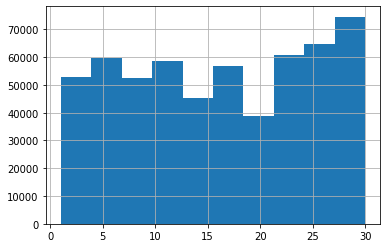

In [53]:
data.dom.hist()

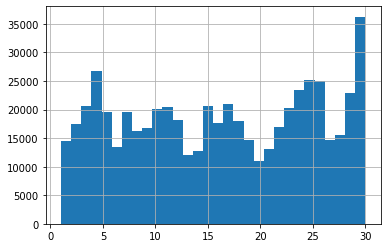

In [54]:
# 30 days
data.dom.hist(bins=30)

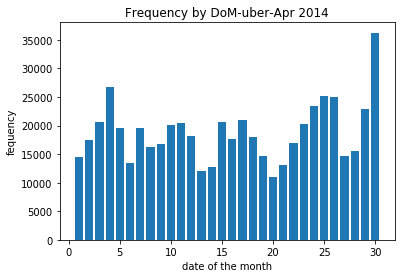

In [58]:
plt.hist(data.dom,bins=30,rwidth=0.8,range=(0.5,30.5))
plt.xlabel('date of the month')
plt.ylabel('fequency')
plt.title('Frequency by DoM-uber-Apr 2014')
plt.show()

In [63]:
for k, rows in data.groupby('dom'):
    print(k,len(rows))

1 14546
2 17474
3 20701
4 26714
5 19521
6 13445
7 19550
8 16188
9 16843
10 20041
11 20420
12 18170
13 12112
14 12674
15 20641
16 17717
17 20973
18 18074
19 14602
20 11017
21 13162
22 16975
23 20346
24 23352
25 25095
26 24925
27 14677
28 15475
29 22835
30 36251


In [62]:
for k, rows in data.groupby('dom'):
    print(k,rows)
    break

1                  Date/Time      Lat      Lon    Base  dom  weekday  hour
0      2014-04-01 00:11:00  40.7690 -73.9549  B02512    1        1     0
1      2014-04-01 00:17:00  40.7267 -74.0345  B02512    1        1     0
2      2014-04-01 00:21:00  40.7316 -73.9873  B02512    1        1     0
3      2014-04-01 00:28:00  40.7588 -73.9776  B02512    1        1     0
4      2014-04-01 00:33:00  40.7594 -73.9722  B02512    1        1     0
5      2014-04-01 00:33:00  40.7383 -74.0403  B02512    1        1     0
6      2014-04-01 00:39:00  40.7223 -73.9887  B02512    1        1     0
7      2014-04-01 00:45:00  40.7620 -73.9790  B02512    1        1     0
8      2014-04-01 00:55:00  40.7524 -73.9960  B02512    1        1     0
9      2014-04-01 01:01:00  40.7575 -73.9846  B02512    1        1     1
10     2014-04-01 01:19:00  40.7256 -73.9869  B02512    1        1     1
11     2014-04-01 01:48:00  40.7591 -73.9684  B02512    1        1     1
12     2014-04-01 01:49:00  40.7271 -73.9803  B02

In [65]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

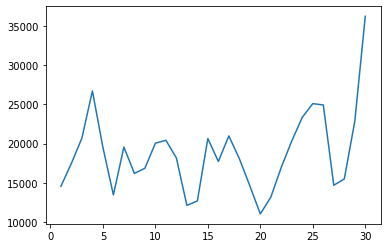

In [67]:
plt.plot(by_date)

<BarContainer object of 30 artists>

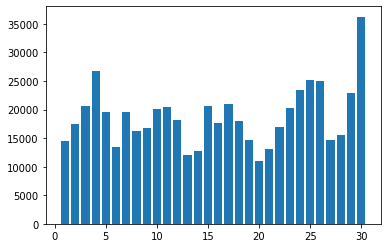

In [68]:
plt.bar(range(1,31),by_date)

In [69]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

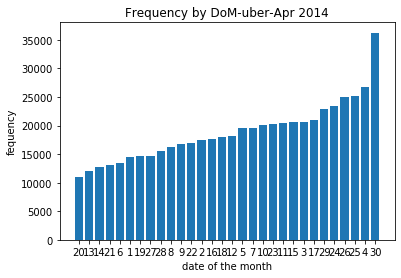

''

In [96]:
plt.bar(range(1,31),by_date_sorted,width=0.8)
plt.xticks(range(1,31),by_date_sorted.index)
plt.xlabel('date of the month')
plt.ylabel('fequency')
plt.title('Frequency by DoM-uber-Apr 2014')
plt.show()
;

# Analysis by Hour

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <a list of 24 Patch objects>)

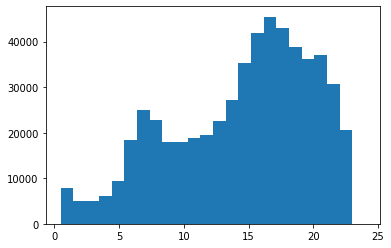

In [84]:
plt.hist(data.hour,bins=24,range=(0.5,24))

## Analyse the weekday

([<matplotlib.axis.XTick at 0x1a2b91e208>,
 <a list of 7 Text xticklabel objects>)

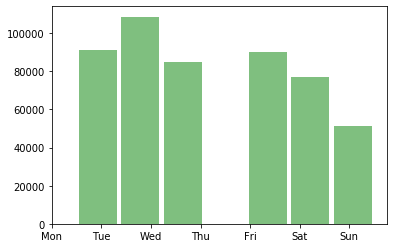

In [104]:
plt.hist(data.weekday,bins=7,range=(0.5,6.5),rwidth=0.9,color='green', alpha=0.5)
plt.xticks(range(7),'Mon Tue Wed Thu Fri Sat Sun'.split())

# cross analysis (hour,dow)

In [107]:
data.groupby('hour weekday'.split()).apply(count_rows)

hour  weekday
0     0           518
      1           765
      2           899
      3           792
      4          1367
      5          3027
      6          4542
1     0           261
      1           367
      2           507
      3           459
      4           760
      5          2479
      6          2936
2     0           238
      1           304
      2           371
      3           342
      4           513
      5          1577
      6          1590
3     0           571
      1           516
      2           585
      3           567
      4           736
      5          1013
      6          1052
4     0          1021
      1           887
                 ... 
19    5          5529
      6          2579
20    0          3573
      1          6310
      2          7783
      3          6345
      4          5165
      5          4792
      6          2276
21    0          3079
      1          5993
      2          6921
      3          6585
      4          6

In [109]:
data.groupby('weekday hour'.split()).apply(count_rows).unstack()

hour       0     1     2     3     4     5     6     7     8     9   ...  \
weekday                                                              ...   
0         518   261   238   571  1021  1619  2974  3888  3138  2211  ...   
1         765   367   304   516   887  1734  3766  5304  4594  2962  ...   
2         899   507   371   585  1003  1990  4230  5647  5242  3846  ...   
3         792   459   342   567   861  1454  3179  4159  3616  2654  ...   
4        1367   760   513   736   932  1382  2836  3943  3648  2732  ...   
5        3027  2479  1577  1013   706   704   844  1110  1372  1764  ...   
6        4542  2936  1590  1052   685   593   669   873  1233  1770  ...   

hour       14    15    16    17    18    19    20    21    22    23  
weekday                                                              
0        3117  3818  4962  5574  4725  4386  3573  3079  1976  1091  
1        4489  6042  7521  8297  7089  6459  6310  5993  3614  1948  
2        5438  7071  8213  9151  8334  7794  7783  6921  4845  2571  
3        4083  5182  6149  6951  6637  5929  6345  6585  5370  2909  
4        4087  5354  6259  6790  7258  6247  5165  6265  6708  5393  
5        3042  4457  5410  5558  6165  5529  4792  5811  6493  5719  
6        2934  3400  3489  3154  2795  2579  2276  2310  1639  1018  

[7 rows x 24 columns]

In [110]:
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

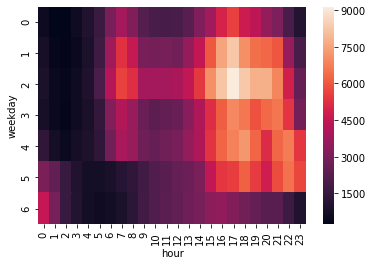

In [111]:
sns.heatmap(by_cross)

# by lat and lon 

''

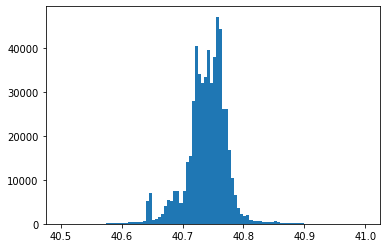

In [115]:
plt.hist(data['Lat'],bins=100,range=(40.5,41))
;

''

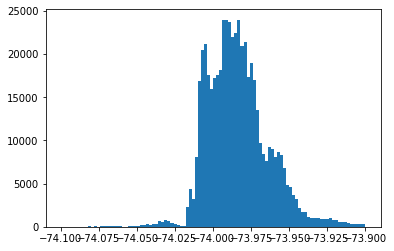

In [119]:
plt.hist(data['Lon'],bins=100,range=(-74.1,-73.9))
;

''

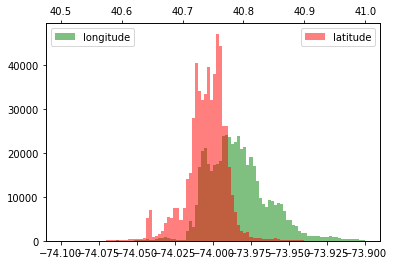

In [122]:
plt.hist(data['Lon'],bins=100,range=(-74.1,-73.9),color='g',alpha=.5,label='longitude')
plt.legend(loc='upper left')
plt.twiny()
plt.hist(data['Lat'],bins=100,range=(40.5,41),color='r',alpha=0.5,label='latitude')
plt.legend(loc='best')
;

(0, 100)

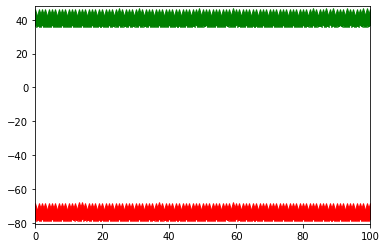

In [132]:
plt.plot(data['Lat'] ,'*',ms=20,color='green',label='lat')
plt.plot(data['Lon'] ,'*',ms=20,color='red',label='lon')
plt.xlim([0,100])

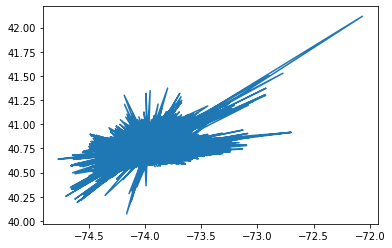

In [133]:
plt.plot(data['Lon'] ,data['Lat'])

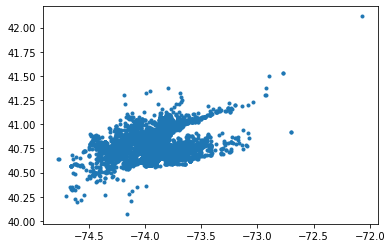

In [138]:
plt.plot(data['Lon'] ,data['Lat'], '.')

(40.7, 41)

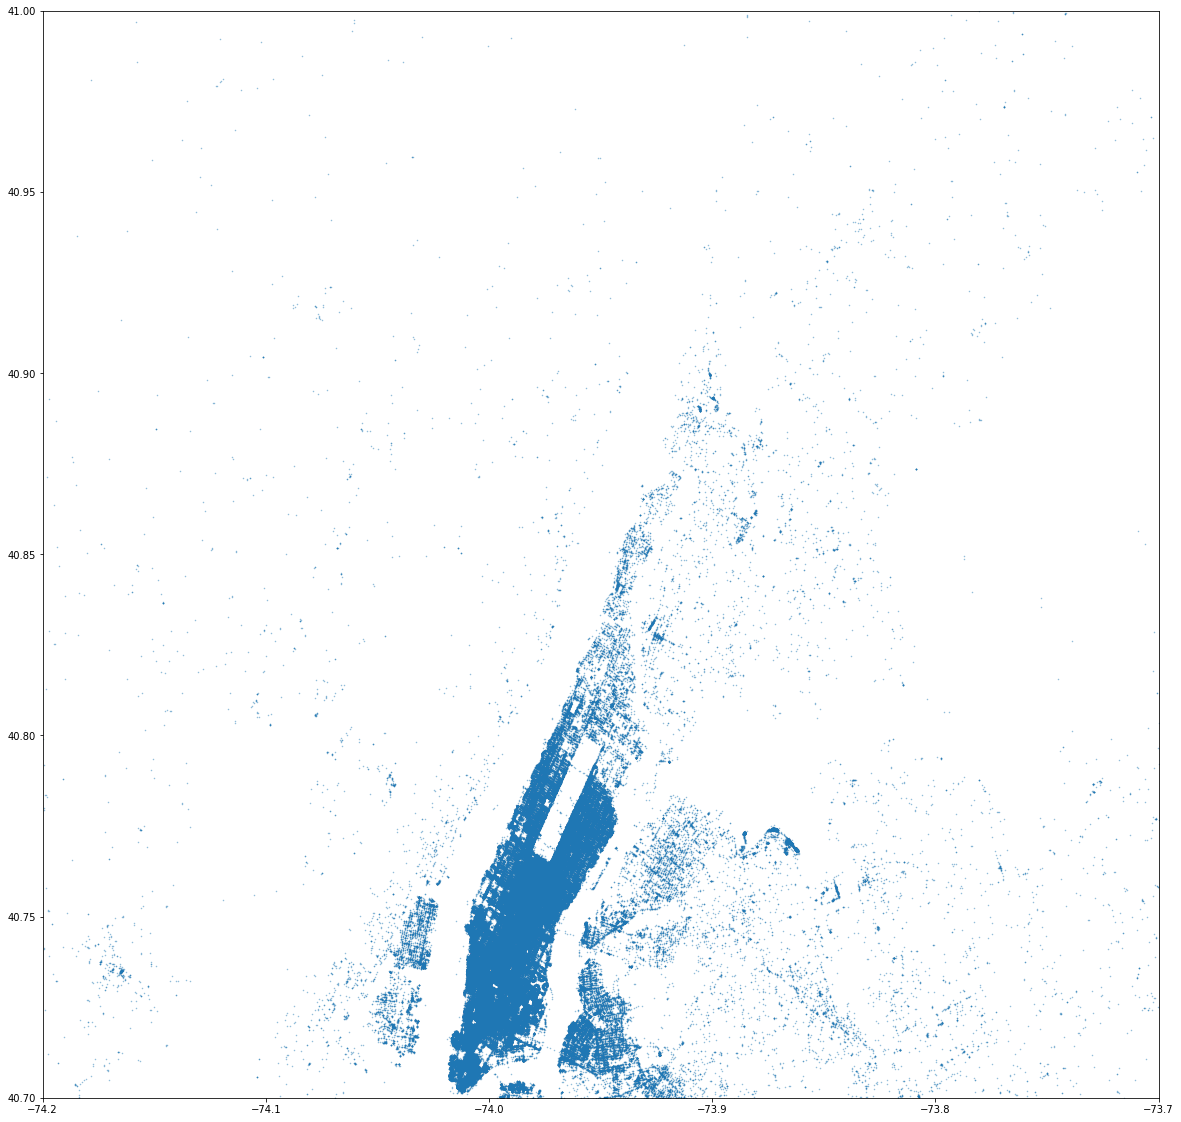

In [144]:
plt.figure(figsize=(20,20))
plt.plot(data['Lon'] ,data['Lat'], '.', ms=1,alpha=0.5)
plt.xlim([-74.2,-73.7])
plt.ylim([40.7,41])